*-> 30 MRI datasets by King’s College London for Left Atrial Segmentation Challenge;*

This repository is associated with the Left Atrial Segmentation Challenge 2013 (LASC'13). LASC'13 was part of the STACOM'13 workshop, held in conjunction with MICCAI'13. Seven international research groups, comprising 11 algorithms, participated in the challenge.

About this Dataset; Left Atrial Segmentation Challenge.

Authors: Catalina Tobon-Gomez (catactg@gmail.com) and Arjan Geers (ajgeers@gmail.com)

* Basic Informations & Backgrounds;


->The challenge is also featured on Cardiac Atlas Project.

The Python scripts in this repository take as input a segmentation and output the two evaluation metrics described in the paper.

The data and code of the challenge have been made publicly available to serve as a benchmark for left atrial segmentation algorithms.

CT: Computed tomography

GT: Ground truth

MRI: Magnetic resonance imaging

LA: Left atrium

LASC'13: Left Atrial Segmentation Challenge 2013

PV: Pulmonary vein

The benchmark consists of 30 CT and 30 MRI datasets. Per modality, 10 datasets are for training of segmentation algorithms and 20 datasets are for testing.

The MRI datasets are publicly available on Figshare;

Training

Testing

Results

->WHAT IS NI

1. NII files mostly belong to NIfTI-1 Data Format by Neuroimaging Informatics Technology Initiative. NIfTI-1 is adapted from the widely used ANALYZE 7.5 file format. The hope is that older non-NIfTI-aware software that uses the ANALYZE 7.5 format will still be compatible with NIfTI-1.

Identifier: Hex: 00 00 01 5C 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00

1. You need a suitable software like NIfTI-1 Data Format from Neuroimaging Informatics Technology Initiative to open a NII file. Without proper software you will receive a Windows message "How do you want to open this file?" or "Windows cannot open this file" or a similar Mac/iPhone/Android alert.

# Required things And Libraries Imports;

In [1]:
import os

#IGNORING WARNINGS
from warnings import filterwarnings
filterwarnings("ignore",category=DeprecationWarning)
filterwarnings("ignore", category=FutureWarning) 
filterwarnings("ignore", category=UserWarning)

In [2]:
!nvidia-smi

Tue Jul 11 20:07:12 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.161.03   Driver Version: 470.161.03   CUDA Version: 11.4     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   39C    P0    28W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [3]:
import os.path
import random
import time
from pathlib import Path
from scipy.io import loadmat
import glob
import nibabel as nib

In [4]:
#Basic Packages  
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

In [5]:
#IMAGE PROCESS
from skimage import data, io, filters
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from PIL import Image

from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2
from keras.applications.vgg16 import preprocess_input, decode_predictions
from keras.preprocessing import image
#from skimage.feature import hessian_matrix, hessian_matrix_eigvals
from scipy.ndimage.filters import convolve

import skimage
#from skimage.morphology import convex_hull_image, erosion
from IPython import display
from scipy.ndimage import gaussian_filter

In [6]:
#SCALER & TRANSFORMATION
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split
from keras import regularizers
from sklearn.preprocessing import LabelEncoder

In [7]:
#ACCURACY CONTROL
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, roc_curve
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
#OPTIMIZER
from keras.optimizers import RMSprop,Adam,Optimizer,Optimizer, SGD

In [8]:
#Computer Vision And Deep Learning Model Packages
import tensorflow as tf
from tensorflow.keras.models import Sequential

from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization,MaxPooling2D,BatchNormalization,\
                        Permute, TimeDistributed, Bidirectional,GRU, SimpleRNN,\
LSTM, GlobalAveragePooling2D, SeparableConv2D, ZeroPadding2D, Convolution2D, ZeroPadding2D,Reshape, Conv2DTranspose,\
LeakyReLU, GaussianNoise, GlobalMaxPooling2D, ReLU, Input, Concatenate
from keras import models

from keras.applications import VGG16,VGG19,inception_v3
from keras.utils import plot_model
import keras
from keras.models import Model
from keras import layers
from keras import backend as K

* Data Reads & Dataset informations ; Pre-Processing & Feature Extractions

In [9]:
Main_NII_Path = Path("../input/heart-mri-image-dataset-left-atrial-segmentation/imagesTr")

Label_NII_Path = Path("../input/heart-mri-image-dataset-left-atrial-segmentation/labelsTr")

In [10]:
NII_Images = list(Main_NII_Path.glob(r"*.nii"))

NII_Labels = list(Label_NII_Path.glob(r"*.nii"))

In [11]:
len(NII_Images)

20

In [12]:
len(NII_Labels)

20

In [13]:
Images_Series = pd.Series(NII_Images,name="IMAGE").astype(str)

Labels_Series = pd.Series(NII_Labels,name="LABEL").astype(str)

In [14]:
Main_Data = pd.concat([Images_Series,Labels_Series],axis=1)

In [15]:
print(Main_Data.head(10))

                                               IMAGE  \
0  ../input/heart-mri-image-dataset-left-atrial-s...   
1  ../input/heart-mri-image-dataset-left-atrial-s...   
2  ../input/heart-mri-image-dataset-left-atrial-s...   
3  ../input/heart-mri-image-dataset-left-atrial-s...   
4  ../input/heart-mri-image-dataset-left-atrial-s...   
5  ../input/heart-mri-image-dataset-left-atrial-s...   
6  ../input/heart-mri-image-dataset-left-atrial-s...   
7  ../input/heart-mri-image-dataset-left-atrial-s...   
8  ../input/heart-mri-image-dataset-left-atrial-s...   
9  ../input/heart-mri-image-dataset-left-atrial-s...   

                                               LABEL  
0  ../input/heart-mri-image-dataset-left-atrial-s...  
1  ../input/heart-mri-image-dataset-left-atrial-s...  
2  ../input/heart-mri-image-dataset-left-atrial-s...  
3  ../input/heart-mri-image-dataset-left-atrial-s...  
4  ../input/heart-mri-image-dataset-left-atrial-s...  
5  ../input/heart-mri-image-dataset-left-atrial-s... 

In [16]:
print(Main_Data.head(-1))

                                                IMAGE  \
0   ../input/heart-mri-image-dataset-left-atrial-s...   
1   ../input/heart-mri-image-dataset-left-atrial-s...   
2   ../input/heart-mri-image-dataset-left-atrial-s...   
3   ../input/heart-mri-image-dataset-left-atrial-s...   
4   ../input/heart-mri-image-dataset-left-atrial-s...   
5   ../input/heart-mri-image-dataset-left-atrial-s...   
6   ../input/heart-mri-image-dataset-left-atrial-s...   
7   ../input/heart-mri-image-dataset-left-atrial-s...   
8   ../input/heart-mri-image-dataset-left-atrial-s...   
9   ../input/heart-mri-image-dataset-left-atrial-s...   
10  ../input/heart-mri-image-dataset-left-atrial-s...   
11  ../input/heart-mri-image-dataset-left-atrial-s...   
12  ../input/heart-mri-image-dataset-left-atrial-s...   
13  ../input/heart-mri-image-dataset-left-atrial-s...   
14  ../input/heart-mri-image-dataset-left-atrial-s...   
15  ../input/heart-mri-image-dataset-left-atrial-s...   
16  ../input/heart-mri-image-da

In [17]:
Or_1_0 = []
Image_List = []
Label_List = []

for i_img,i_mask in zip(Main_Data["IMAGE"].values,Main_Data["LABEL"].values):

    Reading_Train_NII = nib.load(i_img)
    Reading_Label_NII = nib.load(i_mask)
    
    X_Images = Reading_Train_NII.get_fdata()
    X_Labels = Reading_Label_NII.get_fdata()
     
    Selecting_Image = X_Images[X_Images.shape[0]//2] / 255.
    Selecting_Label = X_Labels[X_Images.shape[0]//2] / 255.
    
    if np.mean(Selecting_Label) > 0:
        Or_1_0.append(1)
        Selecting_Image = Selecting_Image.astype("float32")
        Selecting_Label = Selecting_Label.astype("float32")
    
        Image_List.append(Selecting_Image)
        Label_List.append(Selecting_Label)
    else:
        Or_1_0.append(0)

In [18]:
for i_img,i_mask in zip(Main_Data["IMAGE"].values,Main_Data["LABEL"].values):
    Reading_Train_NII = nib.load(i_img)
    Reading_Label_NII = nib.load(i_mask)
    
    X_Images = Reading_Train_NII.get_fdata()
    X_Labels = Reading_Label_NII.get_fdata()
     
    Selecting_Image = X_Images[X_Images.shape[0]//2] / 255.
    Selecting_Label = X_Labels[X_Images.shape[0]//2] / 255.
    
    print(np.shape(Selecting_Image))
    print(np.shape(Selecting_Label))
    print("---"*20)

(320, 120)
(320, 120)
------------------------------------------------------------
(320, 120)
(320, 120)
------------------------------------------------------------
(320, 130)
(320, 130)
------------------------------------------------------------
(320, 100)
(320, 100)
------------------------------------------------------------
(320, 90)
(320, 90)
------------------------------------------------------------
(320, 120)
(320, 120)
------------------------------------------------------------
(320, 110)
(320, 110)
------------------------------------------------------------
(320, 110)
(320, 110)
------------------------------------------------------------
(320, 110)
(320, 110)
------------------------------------------------------------
(320, 120)
(320, 120)
------------------------------------------------------------
(320, 110)
(320, 110)
------------------------------------------------------------
(320, 120)
(320, 120)
------------------------------------------------------------
(320, 

In [19]:
Main_Data["1_OR_0"] = Or_1_0

In [20]:
print(Main_Data.head(10))

                                               IMAGE  \
0  ../input/heart-mri-image-dataset-left-atrial-s...   
1  ../input/heart-mri-image-dataset-left-atrial-s...   
2  ../input/heart-mri-image-dataset-left-atrial-s...   
3  ../input/heart-mri-image-dataset-left-atrial-s...   
4  ../input/heart-mri-image-dataset-left-atrial-s...   
5  ../input/heart-mri-image-dataset-left-atrial-s...   
6  ../input/heart-mri-image-dataset-left-atrial-s...   
7  ../input/heart-mri-image-dataset-left-atrial-s...   
8  ../input/heart-mri-image-dataset-left-atrial-s...   
9  ../input/heart-mri-image-dataset-left-atrial-s...   

                                               LABEL  1_OR_0  
0  ../input/heart-mri-image-dataset-left-atrial-s...       1  
1  ../input/heart-mri-image-dataset-left-atrial-s...       0  
2  ../input/heart-mri-image-dataset-left-atrial-s...       0  
3  ../input/heart-mri-image-dataset-left-atrial-s...       1  
4  ../input/heart-mri-image-dataset-left-atrial-s...       1  
5  ..

In [21]:
print(Main_Data.head(-1))

                                                IMAGE  \
0   ../input/heart-mri-image-dataset-left-atrial-s...   
1   ../input/heart-mri-image-dataset-left-atrial-s...   
2   ../input/heart-mri-image-dataset-left-atrial-s...   
3   ../input/heart-mri-image-dataset-left-atrial-s...   
4   ../input/heart-mri-image-dataset-left-atrial-s...   
5   ../input/heart-mri-image-dataset-left-atrial-s...   
6   ../input/heart-mri-image-dataset-left-atrial-s...   
7   ../input/heart-mri-image-dataset-left-atrial-s...   
8   ../input/heart-mri-image-dataset-left-atrial-s...   
9   ../input/heart-mri-image-dataset-left-atrial-s...   
10  ../input/heart-mri-image-dataset-left-atrial-s...   
11  ../input/heart-mri-image-dataset-left-atrial-s...   
12  ../input/heart-mri-image-dataset-left-atrial-s...   
13  ../input/heart-mri-image-dataset-left-atrial-s...   
14  ../input/heart-mri-image-dataset-left-atrial-s...   
15  ../input/heart-mri-image-dataset-left-atrial-s...   
16  ../input/heart-mri-image-da

In [22]:
print(Image_List[0].shape)
print(Label_List[0].shape)

(320, 120)
(320, 120)


In [23]:
print(type(Image_List[0]))
print(type(Label_List[0]))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [24]:
Testing_Trans = cv2.resize(Image_List[10],(256,256))

In [25]:
print(Testing_Trans.shape)

(256, 256)


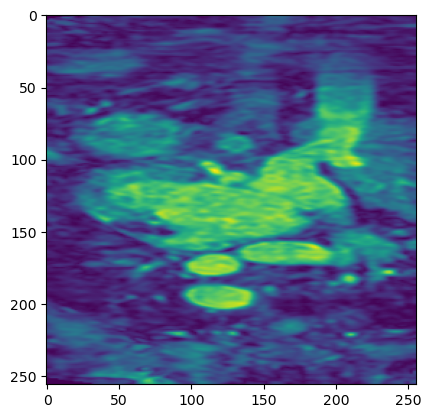

In [26]:
plt.imshow(Testing_Trans)

In [27]:
True_Seg = Main_Data[Main_Data["1_OR_0"] == 1]

In [28]:
Image_List = []
Label_List = []

for i_img,i_mask in zip(True_Seg["IMAGE"].values,True_Seg["LABEL"].values):

    Reading_Train_NII = nib.load(i_img)
    Reading_Label_NII = nib.load(i_mask)
    
    X_Images = Reading_Train_NII.get_fdata()
    X_Labels = Reading_Label_NII.get_fdata()
     
    Selecting_Image = X_Images[X_Images.shape[0]//2] / 255.
    Selecting_Label = X_Labels[X_Images.shape[0]//2] / 255.
    
    Selecting_Image = Selecting_Image.astype("float32")
    Selecting_Label = Selecting_Label.astype("float32")
    
    Resized_IMG = cv2.resize(Selecting_Image,(256,256))
    Resized_LABEL = cv2.resize(Selecting_Label,(256,256))
    
    Image_List.append(Resized_IMG)
    Label_List.append(Resized_LABEL)

In [29]:
len(Image_List)

18

In [30]:
len(Label_List)

18

In [31]:
for indexing_i in range(len(Image_List)):
    print("---"*10)
    print(Image_List[indexing_i].shape)
    print(Label_List[indexing_i].shape)

------------------------------
(256, 256)
(256, 256)
------------------------------
(256, 256)
(256, 256)
------------------------------
(256, 256)
(256, 256)
------------------------------
(256, 256)
(256, 256)
------------------------------
(256, 256)
(256, 256)
------------------------------
(256, 256)
(256, 256)
------------------------------
(256, 256)
(256, 256)
------------------------------
(256, 256)
(256, 256)
------------------------------
(256, 256)
(256, 256)
------------------------------
(256, 256)
(256, 256)
------------------------------
(256, 256)
(256, 256)
------------------------------
(256, 256)
(256, 256)
------------------------------
(256, 256)
(256, 256)
------------------------------
(256, 256)
(256, 256)
------------------------------
(256, 256)
(256, 256)
------------------------------
(256, 256)
(256, 256)
------------------------------
(256, 256)
(256, 256)
------------------------------
(256, 256)
(256, 256)


Cheaking;

Text(0.5, 1.0, 'MASK')

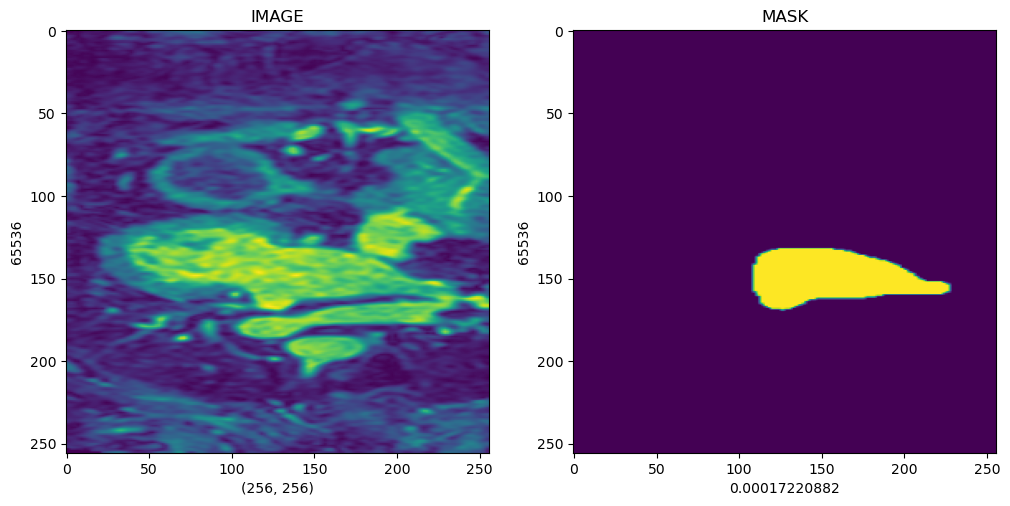

In [32]:
figure,axis = plt.subplots(1,2,figsize=(12,13))

Picking_Example_IMG = Image_List[0]
Picking_Example_Label = Label_List[0]

axis[0].imshow(Picking_Example_IMG)
axis[0].set_xlabel(Picking_Example_IMG.shape)
axis[0].set_ylabel(Picking_Example_IMG.size)
axis[0].set_title("IMAGE")

axis[1].imshow(Picking_Example_Label)
axis[1].set_xlabel(np.mean(Picking_Example_Label))
axis[1].set_ylabel(Picking_Example_Label.size)
axis[1].set_title("MASK")

Text(0.5, 1.0, 'MASK')

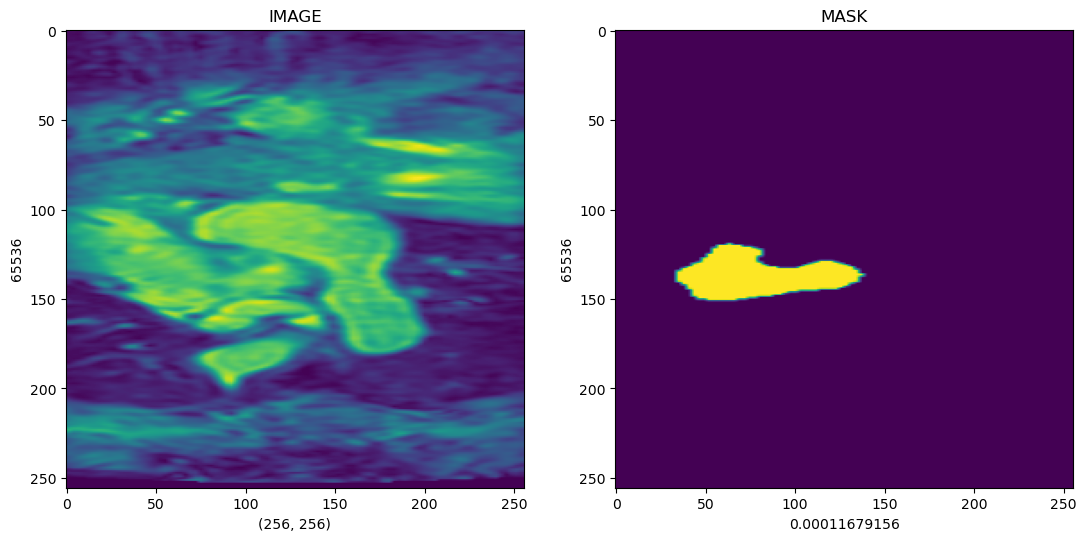

In [33]:
figure,axis = plt.subplots(1,2,figsize=(13,14))

Picking_Example_IMG = Image_List[2]
Picking_Example_Label = Label_List[2]

axis[0].imshow(Picking_Example_IMG)
axis[0].set_xlabel(Picking_Example_IMG.shape)
axis[0].set_ylabel(Picking_Example_IMG.size)
axis[0].set_title("IMAGE")

axis[1].imshow(Picking_Example_Label)
axis[1].set_xlabel(np.mean(Picking_Example_Label))
axis[1].set_ylabel(Picking_Example_Label.size)
axis[1].set_title("MASK")

Text(0.5, 1.0, 'MASK')

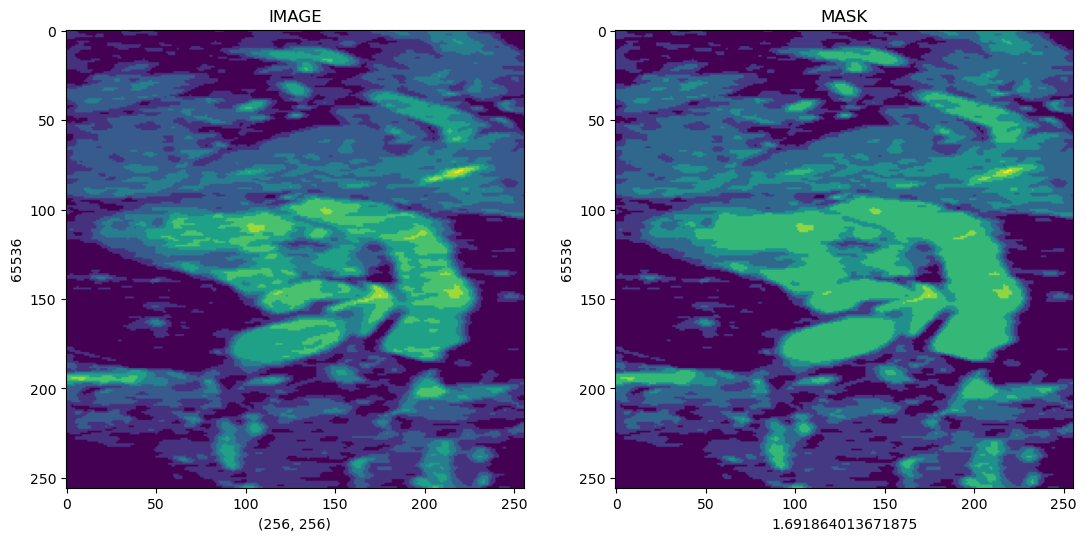

In [34]:
figure,axis = plt.subplots(1,2,figsize=(13,14))

Picking_Example_IMG = Image_List[12]
Picking_Example_Label = Label_List[8]
Picking_Example_Label = Picking_Example_Label.astype("uint8")
Picking_Example_IMG = Picking_Example_IMG.astype("uint8")

Canny_Image = cv2.Canny(Picking_Example_Label,10,100)

NP_Kernel = np.ones((5,5),np.uint8)
Dilation_Image = cv2.dilate(Canny_Image,NP_Kernel,iterations = 5)

Blend_Image = cv2.addWeighted(Picking_Example_IMG,0.8,Dilation_Image,0.4,0.5)

axis[0].imshow(Picking_Example_IMG)
axis[0].set_xlabel(Picking_Example_IMG.shape)
axis[0].set_ylabel(Picking_Example_IMG.size)
axis[0].set_title("IMAGE")

axis[1].imshow(Blend_Image)
axis[1].set_xlabel(np.mean(Blend_Image))
axis[1].set_ylabel(Blend_Image.size)
axis[1].set_title("MASK")

Text(0.5, 1.0, 'MASK')

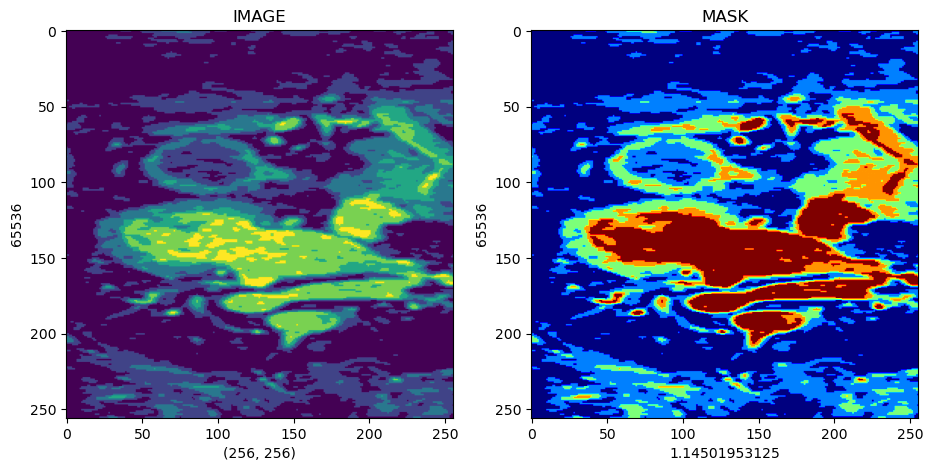

In [35]:
figure,axis = plt.subplots(1,2,figsize=(11,12))

Picking_Example_IMG = Image_List[0]
Picking_Example_Label = Label_List[0]
Picking_Example_Label = Picking_Example_Label.astype("uint8")
Picking_Example_IMG = Picking_Example_IMG.astype("uint8")

Canny_Image = cv2.Canny(Picking_Example_Label,10,100)

NP_Kernel = np.ones((5,5),np.uint8)
Dilation_Image = cv2.dilate(Canny_Image,NP_Kernel,iterations = 5)

Blend_Image = cv2.addWeighted(Picking_Example_IMG,0.8,Dilation_Image,0.4,0.5)

axis[0].imshow(Picking_Example_IMG)
axis[0].set_xlabel(Picking_Example_IMG.shape)
axis[0].set_ylabel(Picking_Example_IMG.size)
axis[0].set_title("IMAGE")

axis[1].imshow(Blend_Image,cmap="jet")
axis[1].set_xlabel(np.mean(Blend_Image))
axis[1].set_ylabel(Blend_Image.size)
axis[1].set_title("MASK")

Text(0.5, 1.0, 'MASK')

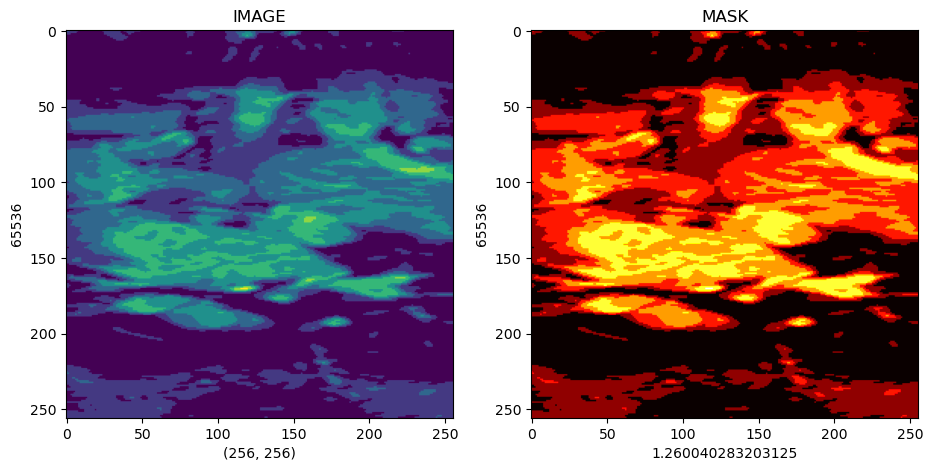

In [36]:
figure,axis = plt.subplots(1,2,figsize=(11,12))

Picking_Example_IMG = Image_List[13]
Picking_Example_Label = Label_List[13]
Picking_Example_Label = Picking_Example_Label.astype("uint8")
Picking_Example_IMG = Picking_Example_IMG.astype("uint8")

Canny_Image = cv2.Canny(Picking_Example_Label,10,100)

NP_Kernel = np.ones((5,5),np.uint8)
Dilation_Image = cv2.dilate(Canny_Image,NP_Kernel,iterations = 5)

Blend_Image = cv2.addWeighted(Picking_Example_IMG,0.8,Dilation_Image,0.4,0.5)

axis[0].imshow(Picking_Example_IMG)
axis[0].set_xlabel(Picking_Example_IMG.shape)
axis[0].set_ylabel(Picking_Example_IMG.size)
axis[0].set_title("IMAGE")

axis[1].imshow(Blend_Image,cmap="hot")
axis[1].set_xlabel(np.mean(Blend_Image))
axis[1].set_ylabel(Blend_Image.size)
axis[1].set_title("MASK")

Text(0.5, 1.0, 'MASK')

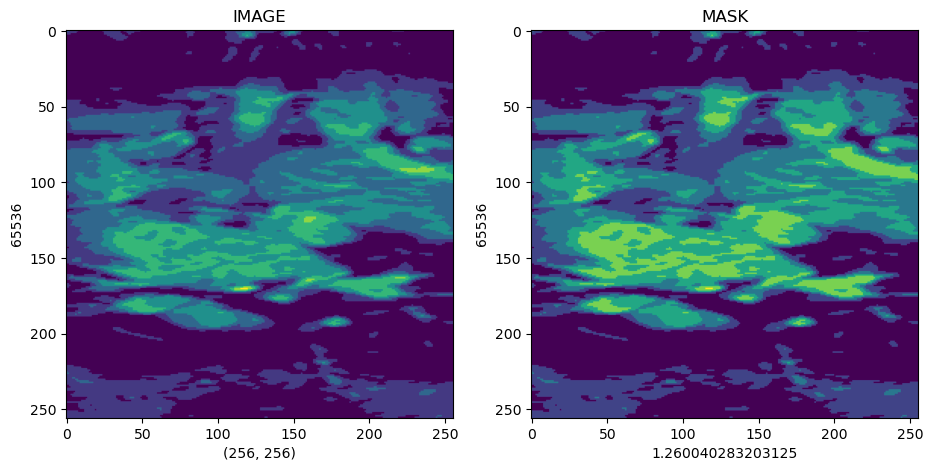

In [37]:
figure,axis = plt.subplots(1,2,figsize=(11,12))

Picking_Example_IMG = Image_List[13]
Picking_Example_Label = Label_List[13]
Picking_Example_Label = Picking_Example_Label.astype("uint8")
Picking_Example_IMG = Picking_Example_IMG.astype("uint8")

Blend_Image = cv2.addWeighted(Picking_Example_IMG,0.8,Picking_Example_Label,0.4,0.5)

axis[0].imshow(Picking_Example_IMG)
axis[0].set_xlabel(Picking_Example_IMG.shape)
axis[0].set_ylabel(Picking_Example_IMG.size)
axis[0].set_title("IMAGE")

axis[1].imshow(Blend_Image)
axis[1].set_xlabel(np.mean(Blend_Image))
axis[1].set_ylabel(Blend_Image.size)
axis[1].set_title("MASK")

Text(0.5, 1.0, 'MASK')

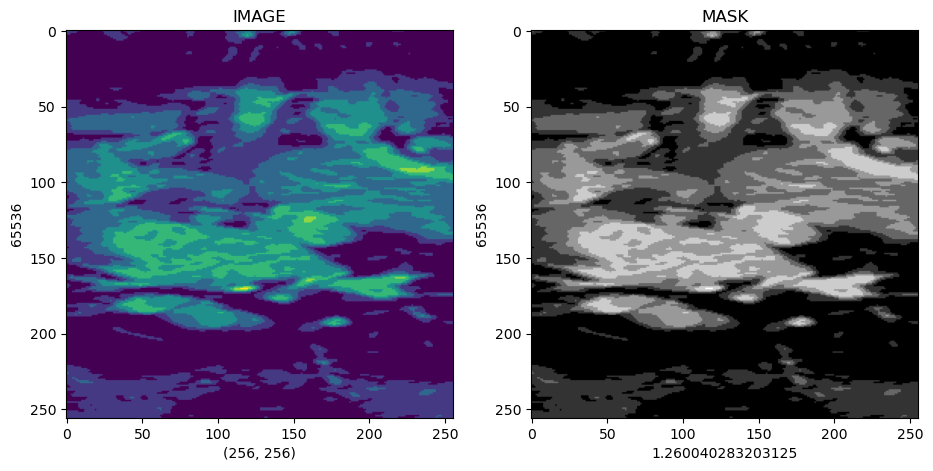

In [38]:
figure,axis = plt.subplots(1,2,figsize=(11,12))

Picking_Example_IMG = Image_List[13]
Picking_Example_Label = Label_List[13]
Picking_Example_Label = Picking_Example_Label.astype("uint8")
Picking_Example_IMG = Picking_Example_IMG.astype("uint8")

Blend_Image = cv2.addWeighted(Picking_Example_IMG,0.8,Picking_Example_Label,0.4,0.5)

axis[0].imshow(Picking_Example_IMG)
axis[0].set_xlabel(Picking_Example_IMG.shape)
axis[0].set_ylabel(Picking_Example_IMG.size)
axis[0].set_title("IMAGE")

axis[1].imshow(Blend_Image,cmap="gray")
axis[1].set_xlabel(np.mean(Blend_Image))
axis[1].set_ylabel(Blend_Image.size)
axis[1].set_title("MASK")

* Convert to Array;

In [39]:
X_TRAIN = np.array(Image_List,dtype="float32")

X_LABEL = np.array(Label_List,dtype="float32")

In [40]:
print(X_TRAIN.shape)

print(X_LABEL.shape)

(18, 256, 256)
(18, 256, 256)


In [41]:
X_TRAIN = X_TRAIN.reshape(X_TRAIN.shape[0],X_TRAIN.shape[1],X_TRAIN.shape[2],1)

X_LABEL = X_LABEL.reshape(X_LABEL.shape[0],X_LABEL.shape[1],X_LABEL.shape[2],1)

In [42]:
print(X_TRAIN.shape)

print(X_LABEL.shape)

(18, 256, 256, 1)
(18, 256, 256, 1)


In [43]:
print(X_TRAIN[0:-1].shape)

(17, 256, 256, 1)


# * U-Net; Encoder-Decoder Models.

In [44]:
Encoder = Sequential()
#
Encoder.add(Conv2D(32,(5,5),kernel_initializer = 'he_normal',use_bias=True,name="ENCODER_INPUT"))
Encoder.add(BatchNormalization())
Encoder.add(ReLU())
#
Encoder.add(Conv2D(64,(5,5),kernel_initializer = 'he_normal',use_bias=True))
Encoder.add(BatchNormalization())
Encoder.add(ReLU())
#
Encoder.add(Conv2D(128,(2,2),kernel_initializer = 'he_normal',use_bias=True))
Encoder.add(BatchNormalization())
Encoder.add(ReLU())
#
Encoder.add(Conv2D(128,(3,3),kernel_initializer = 'he_normal',use_bias=True))
Encoder.add(BatchNormalization())
Encoder.add(ReLU())



Decoder = Sequential()
#
Decoder.add(Conv2DTranspose(128,(3,3)))
Decoder.add(ReLU())
#
Decoder.add(Conv2DTranspose(64,(2,2)))
Decoder.add(ReLU())
#
Decoder.add(Conv2DTranspose(32,(5,5)))
Decoder.add(ReLU())
#
Decoder.add(Conv2DTranspose(1,(5,5),name="DECODER_OUTPUT"))

In [45]:
AE_Structure = Sequential([Encoder,Decoder])

In [46]:
AE_Structure.compile(loss="binary_crossentropy",
                     optimizer=Adam(lr=0.0001),
                     metrics=["accuracy"])

Model Training;

In [47]:
AE_Model = AE_Structure.fit(X_TRAIN[0:-1],
                            X_LABEL[0:-1],epochs=100)

Epoch 1/100
1/1 [==============================] - 12s 12s/step - loss: 0.0862 - accuracy: 0.9578
Epoch 2/100
1/1 [==============================] - 0s 338ms/step - loss: 0.0068 - accuracy: 0.9679
Epoch 3/100
1/1 [==============================] - 0s 331ms/step - loss: 0.0035 - accuracy: 0.9679
Epoch 4/100
1/1 [==============================] - 0s 340ms/step - loss: 0.0030 - accuracy: 0.9679
Epoch 5/100
1/1 [==============================] - 0s 336ms/step - loss: 0.0027 - accuracy: 0.9679
Epoch 6/100
1/1 [==============================] - 0s 342ms/step - loss: 0.0026 - accuracy: 0.9679
Epoch 7/100
1/1 [==============================] - 0s 335ms/step - loss: 0.0025 - accuracy: 0.9679
Epoch 8/100
1/1 [==============================] - 0s 332ms/step - loss: 0.0024 - accuracy: 0.9679
Epoch 9/100
1/1 [==============================] - 0s 334ms/step - loss: 0.0023 - accuracy: 0.9679
Epoch 10/100
1/1 [==============================] - 0s 332ms/step - loss: 0.0022 - accuracy: 0.9679
Epoch 11/1

Model Performance And Prediction on the test datasets;

In [48]:
Prediction_MASK = AE_Structure.predict(X_TRAIN[:10])

1/1 [==============================] - 2s 2s/step


Text(0.5, 1.0, 'PREDICTION')

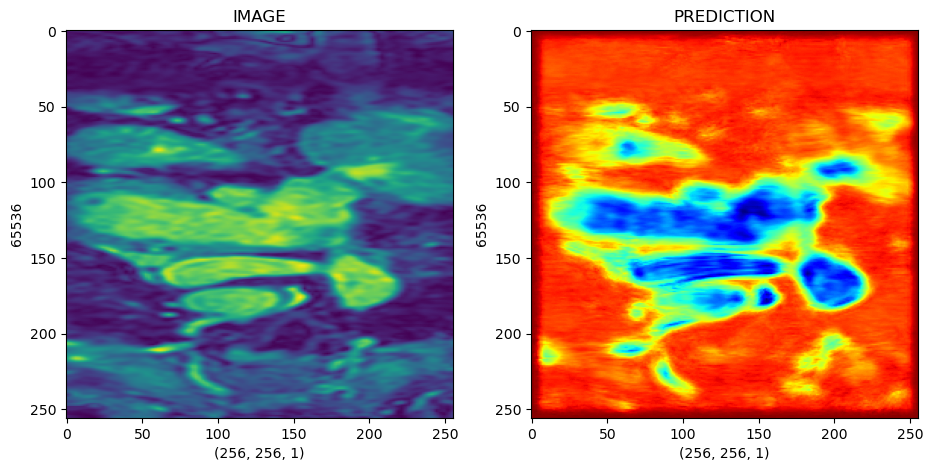

In [49]:
figure,axis = plt.subplots(1,2,figsize=(11,12))
img_number = 1

Original_Img = X_TRAIN[img_number]
Predict_Mask = Prediction_MASK[img_number]

axis[0].imshow(Original_Img)
axis[0].set_xlabel(Original_Img.shape)
axis[0].set_ylabel(Original_Img.size)
axis[0].set_title("IMAGE")
axis[1].imshow(Predict_Mask,cmap="jet")
axis[1].set_xlabel(Predict_Mask.shape)
axis[1].set_ylabel(Predict_Mask.size)
axis[1].set_title("PREDICTION")

Text(0.5, 1.0, 'PREDICTION')

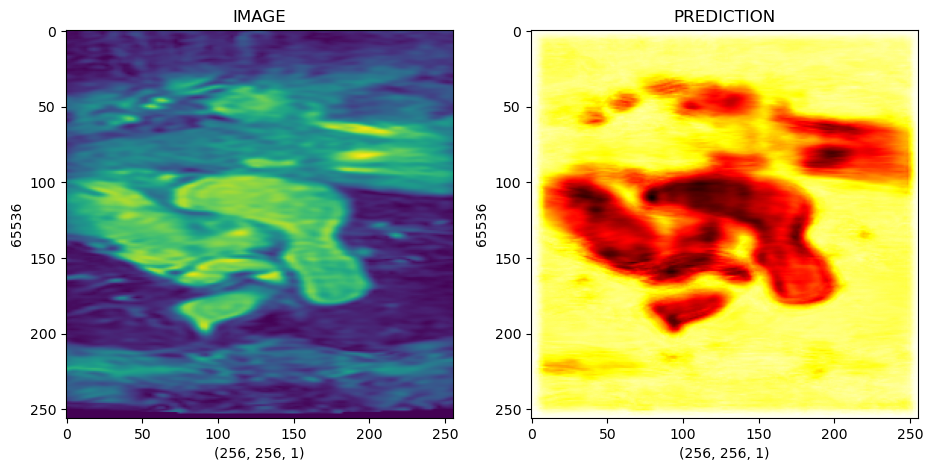

In [50]:
figure,axis = plt.subplots(1,2,figsize=(11,12))
img_number = 2

Original_Img = X_TRAIN[img_number]
Predict_Mask = Prediction_MASK[img_number]

axis[0].imshow(Original_Img)
axis[0].set_xlabel(Original_Img.shape)
axis[0].set_ylabel(Original_Img.size)
axis[0].set_title("IMAGE")
axis[1].imshow(Predict_Mask,cmap="hot")
axis[1].set_xlabel(Predict_Mask.shape)
axis[1].set_ylabel(Predict_Mask.size)
axis[1].set_title("PREDICTION")

Text(0.5, 1.0, 'PREDICTION')

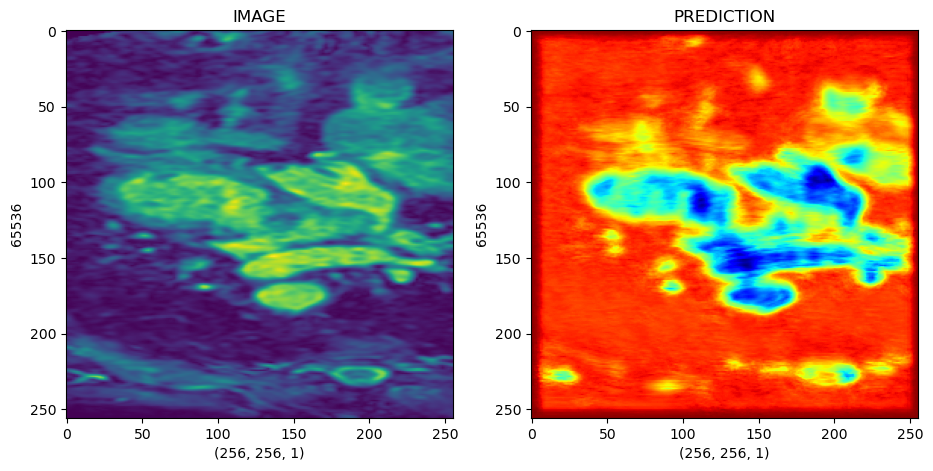

In [51]:
figure,axis = plt.subplots(1,2,figsize=(11,12))
img_number = 3

Original_Img = X_TRAIN[img_number]
Predict_Mask = Prediction_MASK[img_number]

axis[0].imshow(Original_Img)
axis[0].set_xlabel(Original_Img.shape)
axis[0].set_ylabel(Original_Img.size)
axis[0].set_title("IMAGE")
axis[1].imshow(Predict_Mask,cmap="jet")
axis[1].set_xlabel(Predict_Mask.shape)
axis[1].set_ylabel(Predict_Mask.size)
axis[1].set_title("PREDICTION")

Text(0.5, 1.0, 'PREDICTION')

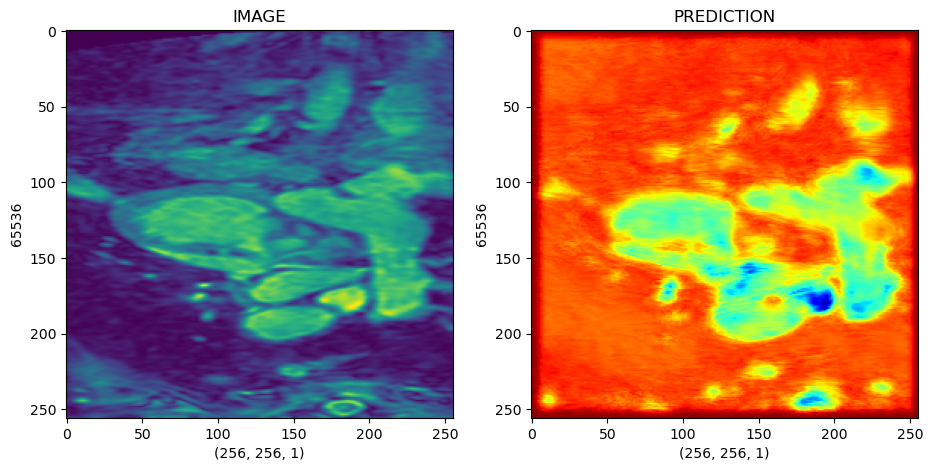

In [52]:
figure,axis = plt.subplots(1,2,figsize=(11,12))
img_number = 9

Original_Img = X_TRAIN[img_number]
Predict_Mask = Prediction_MASK[img_number]

axis[0].imshow(Original_Img)
axis[0].set_xlabel(Original_Img.shape)
axis[0].set_ylabel(Original_Img.size)
axis[0].set_title("IMAGE")
axis[1].imshow(Predict_Mask,cmap="jet")
axis[1].set_xlabel(Predict_Mask.shape)
axis[1].set_ylabel(Predict_Mask.size)
axis[1].set_title("PREDICTION")

Text(0.5, 1.0, 'PREDICTION')

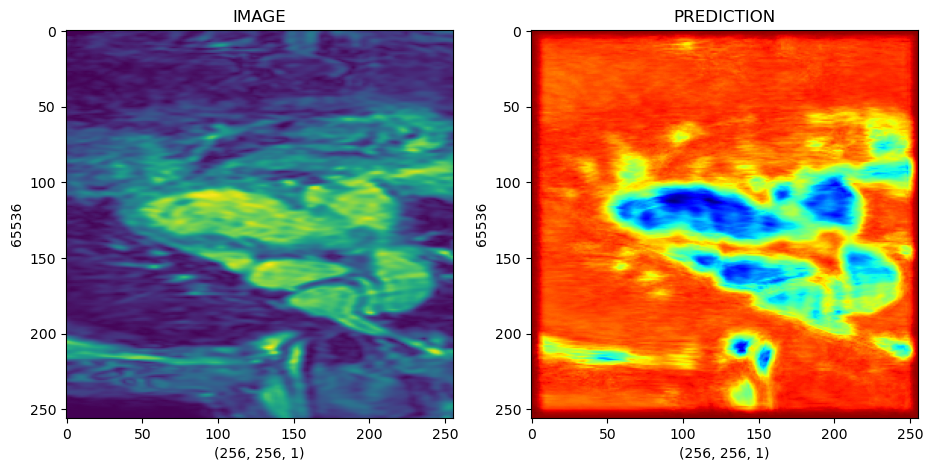

In [53]:
figure,axis = plt.subplots(1,2,figsize=(11,12))
img_number = 5

Original_Img = X_TRAIN[img_number]
Predict_Mask = Prediction_MASK[img_number]

axis[0].imshow(Original_Img)
axis[0].set_xlabel(Original_Img.shape)
axis[0].set_ylabel(Original_Img.size)
axis[0].set_title("IMAGE")
axis[1].imshow(Predict_Mask,cmap="jet")
axis[1].set_xlabel(Predict_Mask.shape)
axis[1].set_ylabel(Predict_Mask.size)
axis[1].set_title("PREDICTION")

In [54]:
print(X_TRAIN[18:].shape)

(0, 256, 256, 1)


In [55]:
print(X_TRAIN[17:].shape)

(1, 256, 256, 1)


In [56]:
Prediction_NON_SEEN = AE_Structure.predict(X_TRAIN[17:])

1/1 [==============================] - 0s 298ms/step


Text(0.5, 1.0, 'PREDICTION')

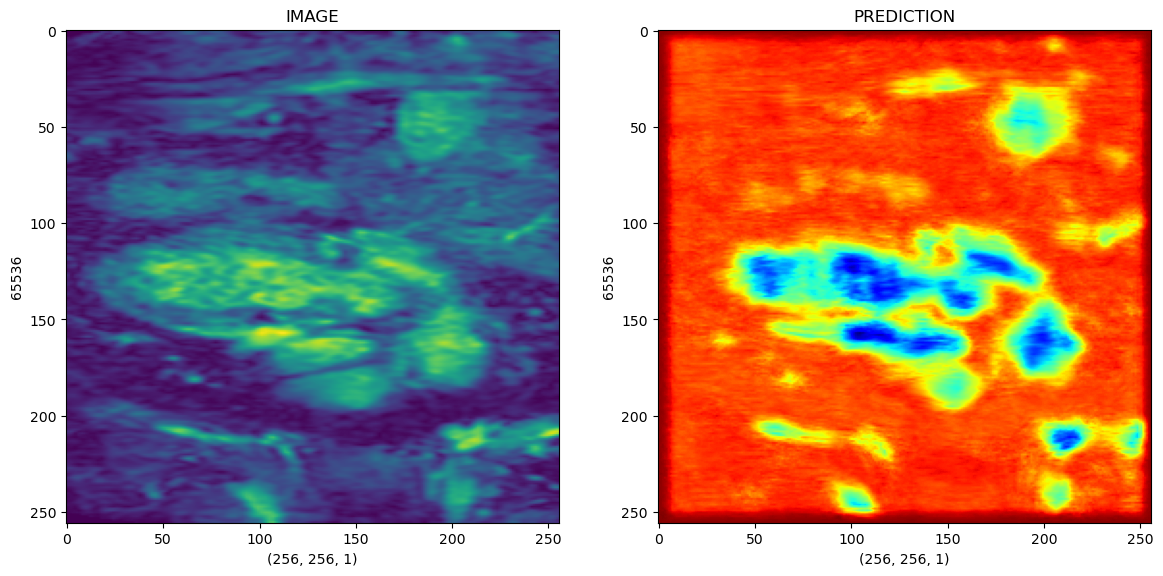

In [57]:
figure,axis = plt.subplots(1,2,figsize=(14,16))
img_number = 17

Original_Img = X_TRAIN[img_number]
Predict_Mask = Prediction_NON_SEEN[0]

axis[0].imshow(Original_Img)
axis[0].set_xlabel(Original_Img.shape)
axis[0].set_ylabel(Original_Img.size)
axis[0].set_title("IMAGE")
axis[1].imshow(Predict_Mask,cmap="jet")
axis[1].set_xlabel(Predict_Mask.shape)
axis[1].set_ylabel(Predict_Mask.size)
axis[1].set_title("PREDICTION")

Text(0.5, 1.0, 'PREDICTION')

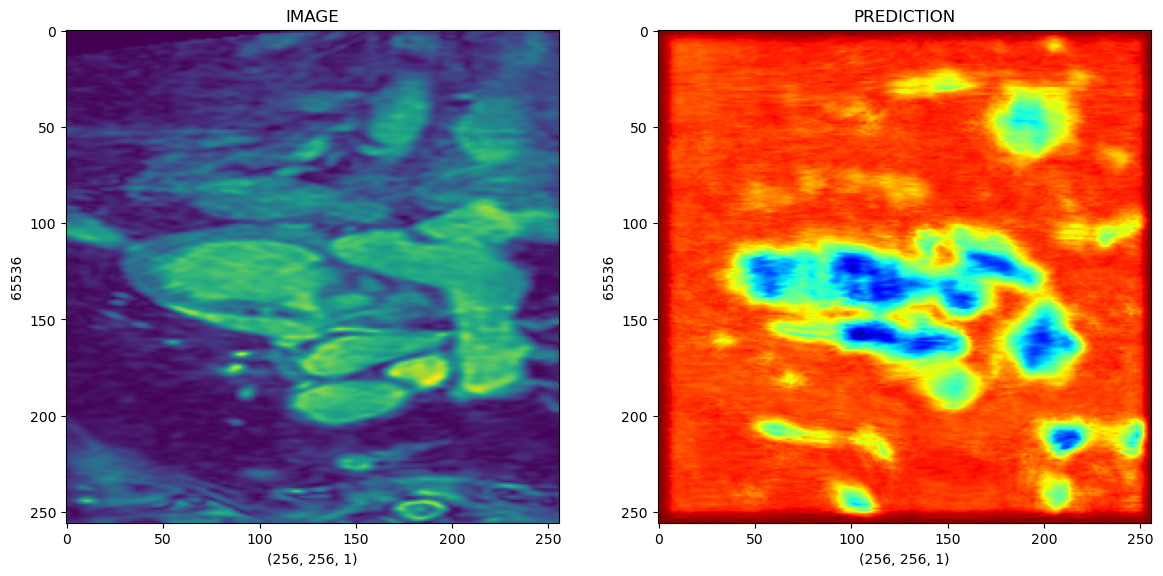

In [58]:
figure,axis = plt.subplots(1,2,figsize=(14,16))
img_number = 15

Original_Img = X_TRAIN[img_number]
Predict_Mask = Prediction_NON_SEEN[0]

axis[0].imshow(Original_Img)
axis[0].set_xlabel(Original_Img.shape)
axis[0].set_ylabel(Original_Img.size)
axis[0].set_title("IMAGE")
axis[1].imshow(Predict_Mask,cmap="jet")
axis[1].set_xlabel(Predict_Mask.shape)
axis[1].set_ylabel(Predict_Mask.size)
axis[1].set_title("PREDICTION")

Text(0.5, 1.0, 'PREDICTION')

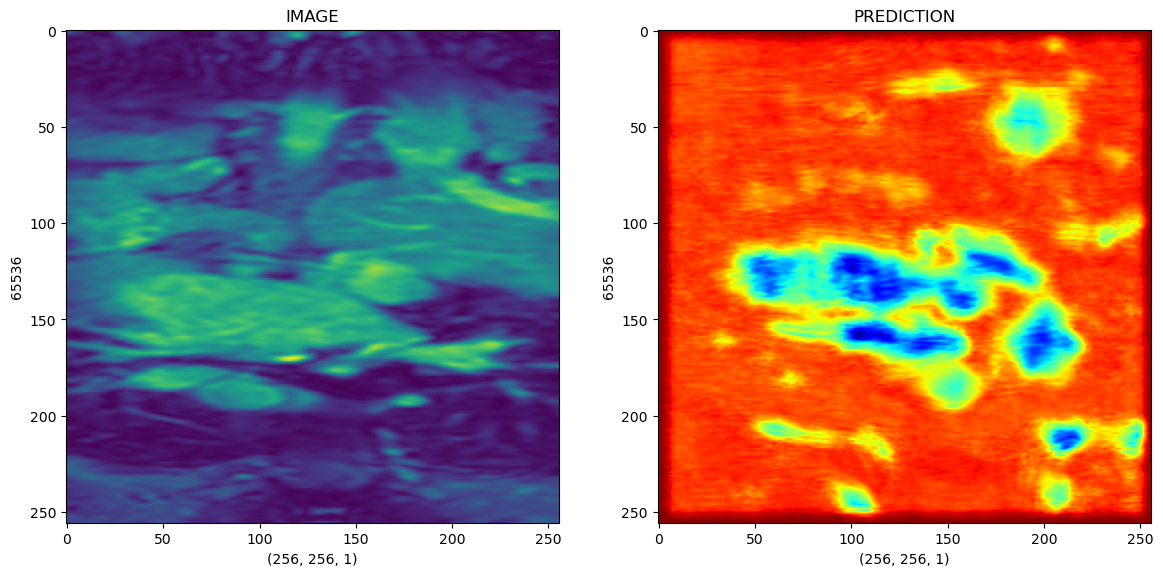

In [59]:
figure,axis = plt.subplots(1,2,figsize=(14,16))
img_number = 13

Original_Img = X_TRAIN[img_number]
Predict_Mask = Prediction_NON_SEEN[0]

axis[0].imshow(Original_Img)
axis[0].set_xlabel(Original_Img.shape)
axis[0].set_ylabel(Original_Img.size)
axis[0].set_title("IMAGE")
axis[1].imshow(Predict_Mask,cmap="jet")
axis[1].set_xlabel(Predict_Mask.shape)
axis[1].set_ylabel(Predict_Mask.size)
axis[1].set_title("PREDICTION")

In [60]:
#